### Logistic Regression Exercise

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print the shape of X

In [4]:
X.shape

(150, 4)

* print y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
    y, train_size=0.75,test_size=0.25)

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [31]:
lr = LogisticRegression(max_iter = 20000)

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [32]:
# l2_list = [0.1, 0.001, 0.0001, 0.00001]
penalty = ['l1', 'l2', 'elasticnet', 'none']

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [33]:
c_list = [0.25, 0.5, 0.75, 1, 1.25]

In [34]:
# {"C": np.logspace(-3,1,7)}

* create a hyperparameter options dictionary

In [35]:
params = {
    'penalty': penalty,
    'C': c_list
}

* create a grid search using 5-fold cross validation

In [36]:
k_folds = 5
grid = GridSearchCV(estimator=lr, param_grid=params,cv=k_folds)

* fit the grid search

In [37]:
grid_result = grid.fit(X_scaled, y_train)

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\silvh\AppDa

* take the best model from grid search

In [68]:
best_model = grid_result.best_estimator_
best_model

LogisticRegression(C=0.25, max_iter=20000, penalty='none')

* print the best hyperparameters

In [39]:
grid_result.best_params_

{'C': 0.25, 'penalty': 'none'}

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [47]:
y_pred = best_model.predict(X_test)

In [64]:
y_proba = best_model.predict_proba(X_test)
y_proba.shape

(38, 3)

- plot the ROC curve and print the AUC

In [57]:
roc_auc_score(y_test, y_proba,multi_class='ovo')

0.9861853832442068

In [58]:
auc = roc_auc_score(y_test, y_proba,multi_class='ovr')
auc

0.9845844061530337

In [62]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2])

In [63]:
# Binarize each label
from sklearn.preprocessing import label_binarize
binary = label_binarize(y_test ,classes=[0,1,2])
binary

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [71]:
from sklearn import metrics

threshold 0 :  [2.00000000e+000 1.00000000e+000 8.17019047e-308 0.00000000e+000]
threshold 1 :  [2.00000000e+000 1.00000000e+000 2.76489223e-026 1.46348117e-026
 3.25975672e-171]
threshold 2 :  [2.00000000e+000 1.00000000e+000 1.31365688e-004 1.38778415e-148
 0.00000000e+000]


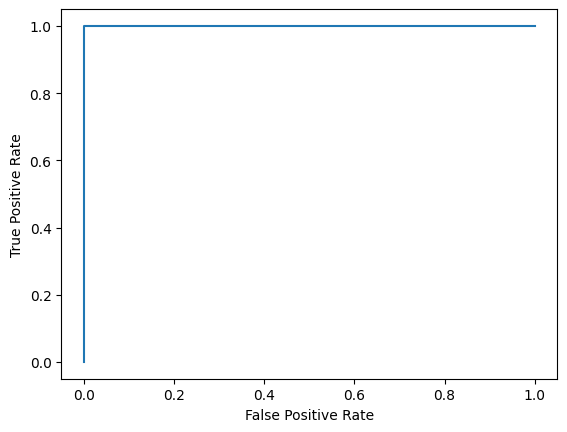

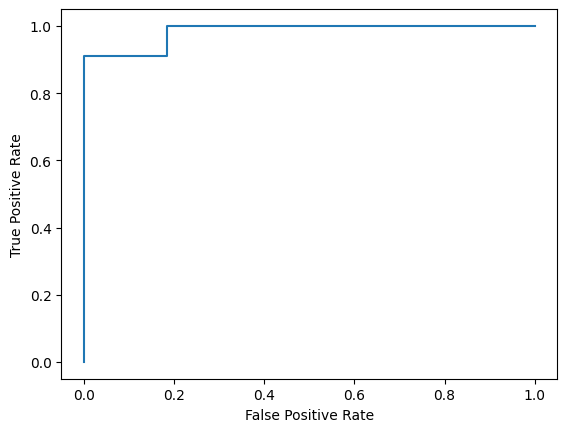

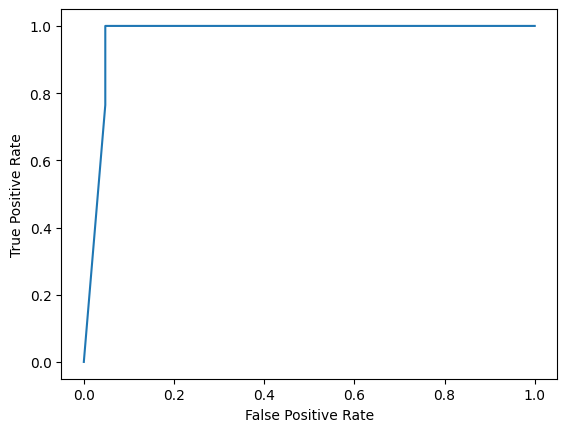

In [81]:
for label in range(3):
    fpr, tpr, thr = metrics.roc_curve(y_test==label, y_proba[:,label])
    print('threshold', label, ': ', thr)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


* print the Logreg coeficients

In [66]:
best_model.coef_

array([[-274.1912957 ,  308.63475091, -476.31457326, -466.97137093],
       [ 295.27671524,  -89.99090975, -428.90464405,   90.92629218],
       [ -21.08541955, -218.64384116,  905.21921731,  376.04507875]])

* print the Logreg intercepts

In [67]:
best_model.intercept_

array([ 348.58068702,  250.22175185, -598.80243887])